4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.4119 - accuracy: 0.8526 - val_loss: 0.3035 - val_accuracy: 0.8873
Epoch 2/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2750 - accuracy: 0.9000 - val_loss: 0.2762 - val_accuracy: 0.8976
Epoch 3/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2255 - accuracy: 0.9184 - val_loss: 0.2447 - val_accuracy: 0.9103
Epoch 4/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.1936 - accuracy: 0.9293 - val_loss: 0.2420 - val_accuracy: 0.9131
Epoch 5/5
313/313 [==============================] - 2s 3ms/step - loss: 0.2863 - accuracy: 0.8986

Test accuracy: 0.8985999822616577


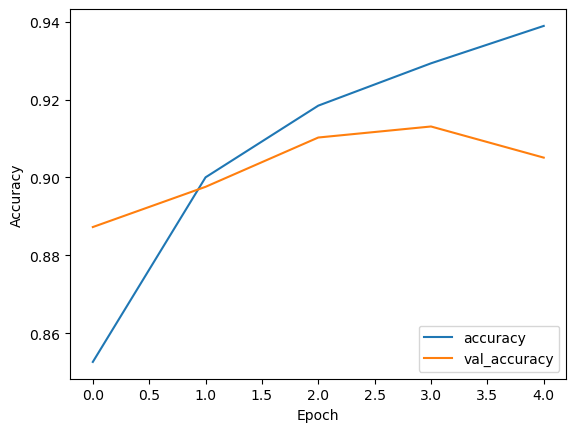

D:\Work\environment-directory\newenv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split the dataset
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Define a simple convolutional neural network
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Save the model
model.save("image_classification_model.h5")
